# 08과 이변량_범주 vs 숫자

## 1.환경준비

* 라이브러리 불러오기

In [1]:
import pandas as pd
import numpy as np
import random as rd

import matplotlib.pyplot as plt
import seaborn as sns

import scipy.stats as spst

* 데이터 불러오기 : 다음의 예제 데이터를 사용합니다.
> 타이타닉 생존자

|	변수	|	설명	|	값 설명	|
|	----	|	----	|	----	|
|	survived	|	생존여부	|	0 - 사망, 1- 생존	|
|	Pclass	|	Ticket class	|	1 = 1st, 2 = 2nd, 3 = 3rd	|
|	Sex	|	성별	|		|
|	Age	|	Age in years	|		|
|	Sibsp	|	# of siblings / spouses aboard the Titanic	|		|
|	Parch	|	# of parents / children aboard the Titanic	|		|
|	Ticket	|	Ticket number	|		|
|	Fare	|	Passenger fare	|		|
|	Cabin	|	Cabin number	|		|
|	Embarked	|	Port of Embarkation	|	C = Cherbourg, Q = Queenstown, S = Southampton	|


In [2]:
# 타이타닉 데이터
titanic = pd.read_csv('https://raw.githubusercontent.com/DA4BAM/dataset/master/titanic.0.csv')
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


범주별 숫자를 비교할 때 사용되는 방식은 **범주별 평균 비교** 입니다.  


## 2.평균비교

### 평균

* 범주 ==> 숫자 의 관계를 살펴볼 때 중요한 관점은 ‘평균비교’ 입니다. 

* 평균을 비교할 때는 두 가지를 고려해야 합니다.
    * ① 평균값이 그 집단을 대표할 수 있는가?
    * ② 평균값이 믿을 만 한가?

### 1) 평균값이 그 집단을 대표할 수 있는가?

In [3]:
s0 = titanic.loc[titanic['Survived']==0, 'Age']
s1 = titanic.loc[titanic['Survived']==1, 'Age']

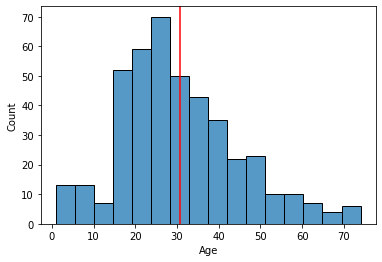

In [4]:
# 사망자의 나이 분포
sns.histplot(s0, bins = 16)
plt.axvline(s0.mean(), color='r')
plt.show()

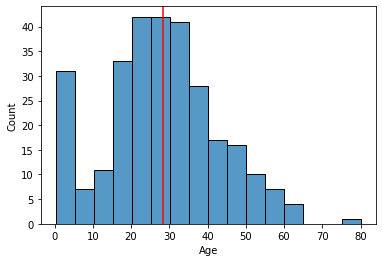

In [5]:
# 생존자의 나이 분포
sns.histplot(s1, bins = 16)
plt.axvline(s1.mean(), color='r')
plt.show()

* 그래프가 정규분포 모양일 때 평균이 집단을 대표한다고 할 수 있다.
* 평균이 집단을 대표하지 못할때..

> 평균의 함정 : https://www.youtube.com/watch?v=Pp_Pd6GZLOE

In [6]:
# 임의의 한 집단을 만들어 봅시다.
pop = [round(rd.normalvariate(10, 5),1) for i in range(1000)] + [round(rd.normalvariate(38, 8),1) for i in range(750)]
mn = np.mean(pop)
print(mn)

22.094971428571426


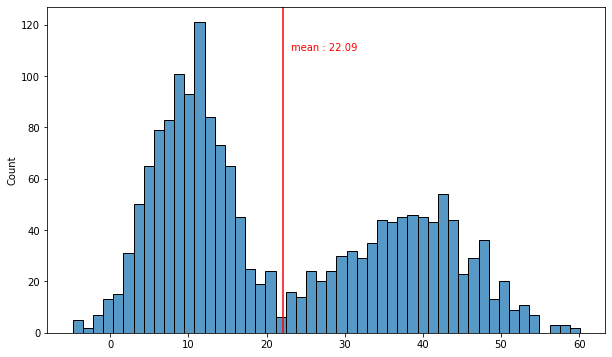

In [7]:
# 히스토그램으로 집단의 대표값이 될 수 있는지 살펴봅시다.
plt.figure(figsize=(10,6))
sns.histplot(pop, bins = 50)
plt.axvline(mn, color='r')
plt.text(mn+1, 110, "mean : {}".format(round(mn,2)), color = 'r')
plt.show()

- 1. 정규분포냐.
- 2. 비교할 대상하고 분산이 유사하냐.

### 2) 평균값을 믿을 만 한가?

* 표본 조사를 수행하기로 결정하였을 때,다음 두가지 조사의 오차에 대해서 생각해 봅시다.
    * 조사1 : 전국 성인 10명을 무작위로 뽑아서, 키를 재고 그 평균을 계산했더니 174 cm
    * 조사2 : 전국 성인 1000명을 무작위로 뽑아서, 키를 재고 그 평균을 계산했더니 166 cm

* 어떤 조사 결과가 전국 성인의 평균키와 더 가까울 까요? 어떤 조사 결과가 **오차**가 더 적을 까요?

* 평균이 믿을만 한지는 오차로 평가해야 합니다.
    * 표준편차
    * 표준오차

### 3) 표준편차(SD, Standard Deviation)
* 한 집단을 설명하기 위해서
* 그 집단 안에서 대푯값으로 평균을 구할 때
* 값들이 평균으로부터 얼마나 벗어나 있는지(이탈도, deviation)를 나타내는 값.
    * 예 : 우리 반 수학 성적의 평균이 91, 표준편차는 10

In [8]:
a = np.array([23,54,47,64,29,15])

print(f'평균 : {a.mean()}')
print(f'표준편차 : {a.std()}')

평균 : 38.666666666666664
표준편차 : 17.53726191728787


평균 38.6, 표준편차 17.5는 집단 a를 설명(대표)하는 숫자 입니다.

In [9]:
# 표준편차
titanic.groupby('Survived')['Age'].agg(['mean','std'])

,mean,std
Survived,,
0,30.626179,14.172110
1,28.343690,14.950952


### 4) 표준오차(SE, standard error)
* 표준오차는 표준편차와 다른 개념입니다. (표준 편차와 비교하는 개념이 아닙니다!)
* 우선 **표본(의) 평균**을 이해해야 합니다.
* 표본을 뽑아내는(표집, sampling) 목적은, 모집단을 추정하기 위함 입니다.
    * 표본평균을 계산한다는 의미는, 표본의 평균으로 모집단의 평균을 **추정**하기 위함 입니다.(**추정치**)
    * 표본의 평균을 계산하면, 표본 자체의 평균이라는 의미가 아니라, 모평균을 표본으로 추정한 평균치 입니다.
    * 그래서 표본평균 하면 항상 모평균을 의식해야 합니다.
* 그런데 표본평균은 모평균과 완전히 일치할 수는 없습니다. 
* 이 오차를 **표준오차** 라고 합니다.

* 표준오차 공식 : 𝑠/√𝑛
    * 샘플의 표준 편차 : s
    * 데이터 건수 : n
* 표준 오차로 부터 신뢰구간을 계산하게 됩니다.

* 몇가지 기호에 대해서  

<img src='https://github.com/DA4BAM/image/blob/main/%EA%B8%B0%ED%98%B8.png?raw=true' width=500/>

In [10]:
# 표준오차
titanic.groupby('Survived')['Age'].agg(['mean','std','sem'])

,mean,std,sem
Survived,,,
0,30.626179,14.172110,0.688258
1,28.343690,14.950952,0.877950


### 5) 95% 신뢰구간

* 모집단을 하나 준비합니다.

In [11]:
# 임의의 모집단을 하나 만듭시다.
pop2 = [round(rd.normalvariate(160, 10),1) for i in range(100000)]

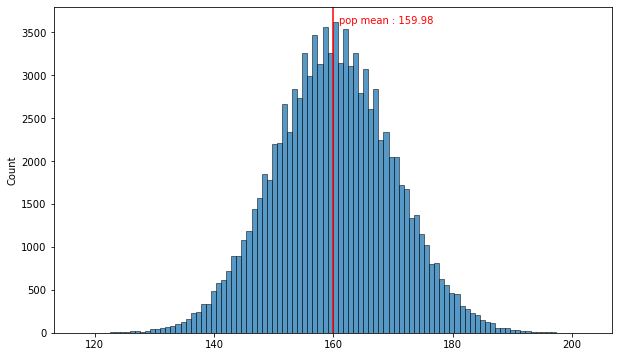

In [12]:
# 우리는 모집단을 알 수 없지만. 그래도 살짝 살펴봅시다. (보고 나서 못 본 것으로 합시다.ㅎㅎ)

plt.figure(figsize=(10,6))
sns.histplot(pop2, bins = 100)
plt.axvline(np.mean(pop2), color = 'r')
plt.text(np.mean(pop2)+1, 3600, f'pop mean : {np.mean(pop2).round(2)}', color = 'r')
plt.show()

* 표본 조사를 합니다. 
    * 100명을 임의로 샘플링 해서 
    * 표본의 평균과, 표준 오차, 신뢰구간을 계산해 봅시다.

In [13]:
# 표본조사를 합니다. 100건
# 모집단에서 100건을 임의로 뽑아냄 (모집단의 모평균 추정하려고)
s1 = rd.sample(pop2,100)
s1 = pd.Series(s1)
s1.mean(), s1.std(), s1.sem()

#표본의 평균, 표준편차, 표준오차

(159.83099999999996, 9.105428450804897, 0.9105428450804898)

In [14]:
1.96 * s1.sem()

1.7846639763577599

In [15]:
# 95% 신뢰구간
s1.mean() - (1.96 * s1.sem()), s1.mean() + (1.96 * s1.sem())

# 95% 신뢰구간 158.0~161.6
# 얘가 모평균을 포함하고 있음
# 모평균 위에 보면 159.98

(158.0463360236422, 161.61566397635772)

* 표본평균의 신뢰구간과 모평균을 비교해 봅시다.

In [ ]:
# 모평균은?
np.mean(pop2)

* 95% 신뢰구간에 대한 실험을 해 봅시다.
    * 샘플조사를 100번 수행합니다.
    * 그때마다 신뢰구간을 계산한 후
    * 그 중 몇번이 모평균을 포함하는지 확인해 봅시다.
    * 95% 신뢰구간이라면, 100번 중 95번은 모평균을 포함해야 합니다.

In [18]:
# 100번 샘플링
samples = { 'id' : [], 'value' : []}
for i in range(100) :
    samples['id'] += [i]* 100
    samples['value'] += rd.sample(pop2,100)

samples = pd.DataFrame(samples)
samples.shape

(10000, 2)

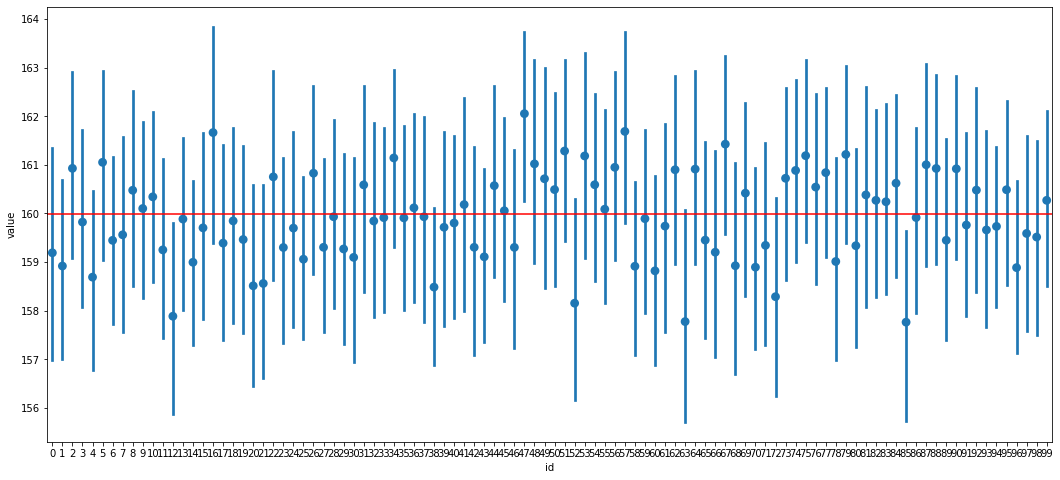

In [19]:
# errorbar 라는 차트 입니다. 
# 신뢰구간, 표준오차 구간을 시각화 하는 방법입니다.

plt.figure(figsize = (18, 8))
sns.pointplot(x = 'id', y = 'value', data = samples, join = False)
plt.axhline(np.mean(pop2), color = 'r')
plt.show()

위 그래프에 대한 해석
* x축은 100번 시도에 대한 순번(인덱스)
* y축은 모평균(빨간 선)을 추정하기 위한 샘플의 평균과, 신뢰구간 표시

따라서, 표본의 평균을 계산했다? 그러면 걔는 정규분포에서 온 애라고 생각하면 됨.

### (참조) 중심극한 정리

* 표본이 클수록 표집분포는 정규분포에 가까워 진다.


* 임의의 모집단을 하나 만듭니다.

In [ ]:
pop = [round(rd.expovariate(.3)+165,2) for i in range(10001)]

* ① 모집단으로 부터 데이터 n개 짜리 표본을 뽑아 표본평균을 계산합니다.
* ② ①번 작업을 m번 반복하여 얻은 표본평균 m개로 분포를 그려봅니다.

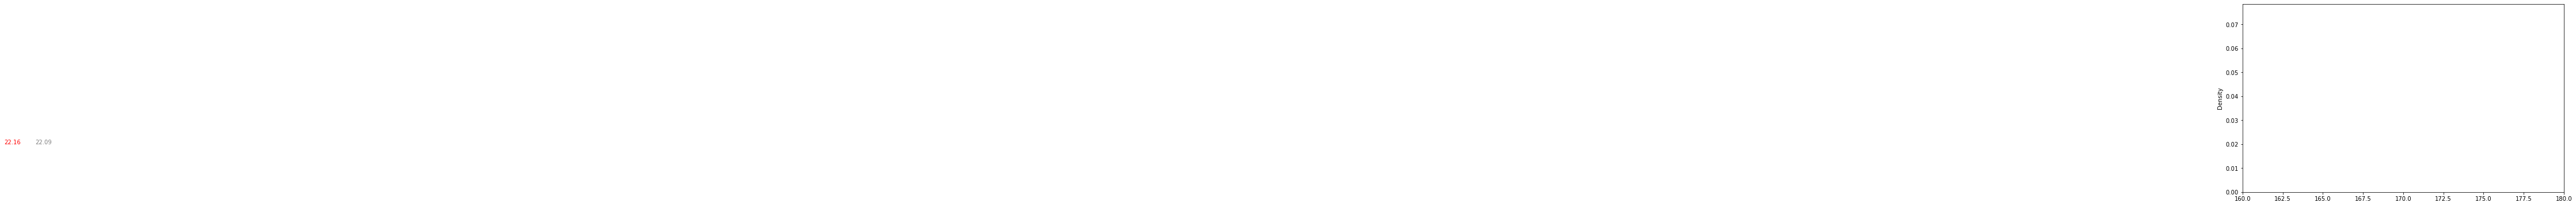

In [17]:
# 표본의 크기
n = 10

# 표본의 갯수
m = 100

sample_mean = [np.mean(rd.sample(pop,n)) for i in range(m)]

plt.figure(figsize=(10,6))
sns.kdeplot(sample_mean)
plt.xlim(160,180)

plt.axvline(x=np.mean(sample_mean), color = 'red') #표본평균들의 평균
plt.axvline(x=np.mean(pop), color = 'grey') # 모평균

plt.text(np.mean(sample_mean)-1.5, 0.02, round(np.mean(sample_mean),2), color = 'red') #표본평균들의 평균
plt.text(np.mean(pop)+.5,0.02, round(np.mean(pop),2), color = 'grey') #모평균

plt.show() # show

* 그렇다면, 모집단은 어떤 분포일까?


In [ ]:
plt.figure(figsize=(10,6)) #설정
sns.histplot(pop, bins = 100)
plt.axvline(x=np.mean(pop), color = 'grey') # 모평균
plt.text(np.mean(pop)+.5, 800, round(np.mean(pop),2), color = 'grey')
plt.show() 

## 3.범주 --> 숫자

titanic data에서 Age를 Y로 두고 비교해 봅시다.

### 1) 시각화 : 평균 비교 barplot, boxplot 

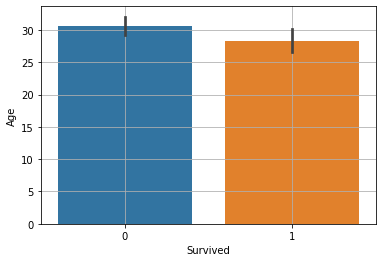

In [21]:
# sns.barplot는 두 범주의 평균 비교 sns.barplot
sns.barplot(x="Survived", y="Age", data=titanic)
plt.grid() #grid있으면 좀 더 보기 용이함.
plt.show()

#그래프 끝나는 지점이 평균
#위에있는 검정선이 신뢰구간

위 두 범주간에 평균에 차이가 있나요?

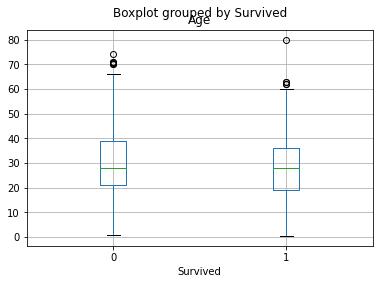

In [22]:
# 박스플롯으로 비교해 봅시다.
titanic.boxplot('Age', 'Survived')
plt.show()

### 2)수치화 : t-test(두 범주), anova(세 범주 이상)

#### ①t-test
두 집단의 평균을 비교합니다.
* 예제는 Two sample T-test와 양측검정만 다룹니다. 
* 우리는 X --> Y의 관계에서 ,두 변수간에 관련이(차이가) 있는지, 없는지를 확인하는 것이 제일 중요하기 때문입니다.

* 주의사항 : 데이터에 NaN이 있으면 계산이 안됩니다. .notnull() 등으로 NaN을 제외한 데이터를 사용해야 합니다.

* t 통계량
    * 두 평균의 차이를 표준오차로 나눈 값.
    * 기본적으로는 두 평균의 차이로 이해해도 좋습니다.
    * 우리의 가설(대립가설)은 차이가 있다는 것이므로, t 값이 크던지 작던지 하기를 바랍니다. 
    * 보통, t 값이 -2보다 작거나, 2보다 크면 차이가 있다고 봅니다. 

In [23]:
import scipy.stats as spst
import numpy as np
import random as rd


In [ ]:
# 모집단 만들기
pop1 = [round(rd.normalvariate(160, 10),1) for i in range(100000)]
pop2 = [round(rd.normalvariate(170, 10),1) for i in range(100000)]

In [ ]:
# 우리는 모집단을 알 수 없지만. 그래도 살짝 살펴봅시다.
plt.figure(figsize=(10,6))
sns.distplot(pop1, hist=False, kde=True)
sns.distplot(pop2, hist=False, kde=True)
plt.show()

In [ ]:
# 표본을 추출합니다. 먼저 pop1으로 부터 두 샘플을 추출합시다.
s1 = rd.sample(pop1,100)
s2 = rd.sample(pop1,100)


In [ ]:
# t-test
spst.ttest_ind(s1, s2)

p.value의 의미는?

In [ ]:
# 이번에는 두 모집단으로 부터 각각 샘플링
s1 = rd.sample(pop1,100)
s2 = rd.sample(pop2,100)

In [ ]:
# t-test
spst.ttest_ind(s1, s2)

p.value의 의미는?

* 이번엔 타이타닉 데이터로 시도해 봅시다.
    * 생존여부 --> Age : 생존여부 별로 나이에 차이가 있을것이다.


In [24]:
# 먼저 NaN이 있는지 확인해 봅시다.
titanic.isna().sum()

#NaN있으면 안됨.

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [26]:
temp = titanic.loc[titanic['Age'].notnull()]
died = temp.loc[temp['Survived']==0, 'Age']
survived = temp.loc[temp['Survived']==1, 'Age']

In [27]:
spst.ttest_ind(died, survived)

#t통계량도 약간 2보다 큼 => 얘도 애매 (차이가 있긴있는데 별로 크지는 않다.)
#pvalue가 0.05보다는 작음 => 차이가 있긴있는데 애매..

#생존여부-나이 관련있긴 있는데 아주 적다.

Ttest_indResult(statistic=2.06668694625381, pvalue=0.03912465401348249)

#### 실습 : t-test

성별에 따라 운임에 차이가 있을 것이다.

In [ ]:
# Sex --> Fare

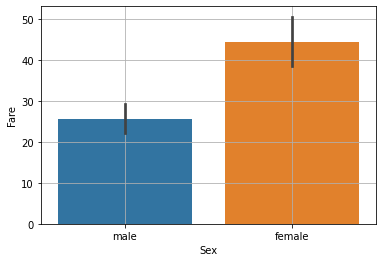

In [31]:
sns.barplot(x='Sex', y='Fare', data=titanic)
plt.grid()
plt.show()

#신뢰구간 짧은거랑 긴 거 중에 뭐가 믿을만한 데이터인가? => 닥 짧은거임

#그리고 그래프 보니까 평균(그래프 끝나는곳)하고 신뢰구간이 두 개가 겹치는게 없어보임
# => 차이가 있을 것이다.

In [32]:
titanic['Sex'].unique()
# => 값들이 소문자로 male, female이다.

array(['male', 'female'], dtype=object)

In [29]:
male = titanic.loc[titanic['Sex']=='male', 'Fare']
female = titanic.loc[titanic['Sex']=='female', 'Fare']

In [30]:
spst.ttest_ind(male, female)

# t통계량 -2보다 엄청 작음 => 차이가 많이 난다.
# pvalue값 0.00000004 < 0.05 => 관련이 있어

#성별에 따라 운임에 차이가 있다.

#눈으로 볼 때 차이가 있으니까 통계량과 pvalue가 이렇게 나왔구나.
#근데 가끔가다가 눈으로 볼때랑 통계량, pvalue가 일치하지 않는 경우가 있다.

#여기서는 가변수화 필요하지 않음.
#이거는 데이터를 살펴보는 거임
#모델링하기 전 전처리에서 가변수화를 진행 (모든 셀에 값이 있어야하고, 값은 숫자여야하고, 필요에따라 스케일링)

Ttest_indResult(statistic=-5.529140269385719, pvalue=4.2308678700429995e-08)

#### ②anova

* 분산 분석 **AN**alysis **O**f **VA**riance
* 여러 집단 간에 차이는 어떻게 비교할 수 있을까요?
* 여기서 기준은 전체 평균 입니다.
* 𝐹 통계량 = 
    * (집단 간 분산)/(집단 내 분산) = (전체 평균 − 각 집단 평균)/(각 집단의 평균 − 개별 값)
    * 값이 대략 2~3 이상이면 차이가 있다고 판단합니다.
    * 차이가 난다는 것의 기준은
        * 1. 집단 간 분산이 커야 하고,
        * 2. 집단 내 분산이 작아야 한다.

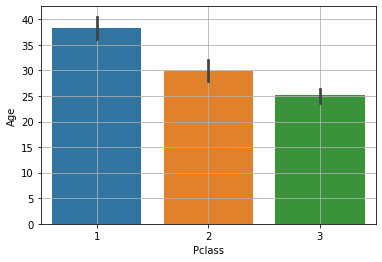

In [34]:
# Pclass(3 범주) --> Age
sns.barplot(x="Pclass", y="Age", data=titanic)
plt.grid()
plt.show()

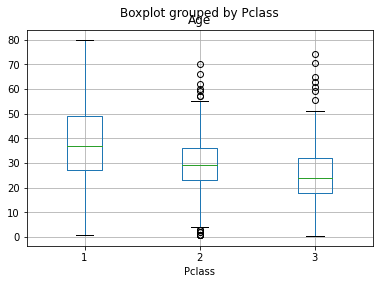

In [35]:
titanic.boxplot('Age', 'Pclass')
plt.show()

In [38]:
temp.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          529
Embarked         2
dtype: int64

In [40]:
P_1 = temp.loc[temp.Pclass == 1, 'Age']
P_2 = temp.loc[temp.Pclass == 2, 'Age']
P_3 = temp.loc[temp.Pclass == 3, 'Age']

In [41]:
spst.f_oneway(P_1, P_2, P_3)
#nan이 없어야 한다.

#f통계량 약 57.44
#pvalue 약 0.00000000000..00749

# f 통계량 2나 3보다 큰 정도가 아니라 완전 큼 => 차이가 있다.
# pvalue<0.5, 0에 가까움 => 완전 관계가 있다


F_onewayResult(statistic=57.443484340676214, pvalue=7.487984171959904e-24)


#### 실습 ANOVA

승선지역(Embarked)별로 운임에 차이가 있을 것이다.
* 시각화와 수치화로 확인해 봅시다.

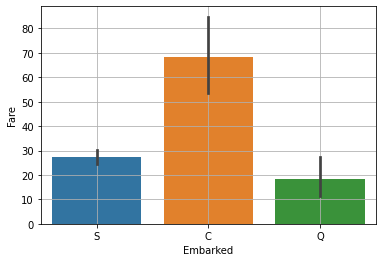

In [48]:
sns.barplot(x="Embarked", y="Fare", data=temp)
plt.grid()
plt.show()

#사실 이렇게까지 차이가 있으면 분산분석하나안하나 뻔함~!

In [43]:
temp2 = temp.loc[temp['Embarked'].notnull()]
# 사실 어차피 S, C, Q 빼오니까 notnull() 과정 필요 없어.

In [45]:
temp2['Embarked'].unique()

array(['S', 'C', 'Q'], dtype=object)

In [46]:
S = temp2.loc[temp2['Embarked']=='S', 'Fare']
C = temp2.loc[temp2['Embarked']=='C', 'Fare']
Q = temp2.loc[temp2['Embarked']=='Q', 'Fare']

In [47]:
spst.f_oneway(S, C, Q)

#완전 관련있음

F_onewayResult(statistic=35.89219045311384, pvalue=1.4184349041133077e-15)

# 종합실습 => 복습용 숙제

## 1.환경준비

* 라이브러리 불러오기

In [ ]:
import pandas as pd
import numpy as np
import random as rd

import matplotlib.pyplot as plt
import seaborn as sns

import scipy.stats as spst

* 데이터 불러오기 : 다음의 예제 데이터를 사용합니다.
> ① 타이타닉 생존자  
② 카시트 매출액


① 타이타닉 생존자

|	변수	|	설명	|	값 설명	|
|	----	|	----	|	----	|
|	survived	|	생존여부	|	0 - 사망, 1- 생존	|
|	Pclass	|	Ticket class	|	1 = 1st, 2 = 2nd, 3 = 3rd	|
|	Sex	|	성별	|		|
|	Age	|	Age in years	|		|
|	Fare	|	Passenger fare	|		|
|	Embarked	|	Port of Embarkation	|	C = Cherbourg, Q = Queenstown, S = Southampton	|


In [ ]:
# 타이타닉 데이터
titanic = pd.read_csv('https://raw.githubusercontent.com/DA4BAM/dataset/master/titanic.1.csv', 
                      usecols = ['Survived','Pclass','Sex','Age','Fare','Embarked'])
titanic.head()

② 카시트 매출액

|	변수명	|	설명	|	구분	|
|	----	|	----	|	----	|
|	Sales 	|	 각 지역 판매액(단위 : 1000달러)	|	Target	|
|	CompPrice 	|	 경쟁사 가격(단위 : 달러)	|	feature	|
|	Income 	|	 지역 평균 소득(단위 : 1000달러)	|	feature	|
|	Advertising 	|	 각 지역, 회사의 광고 예산(단위 : 1000달러)	|	feature	|
|	Population 	|	 지역 인구수(단위 : 1000명)	|	feature	|
|	Price 	|	 자사 지역별 판매가격	|	feature	|
|	ShelveLoc 	|	 진열상태	|	feature	|
|	Age 	|	 지역 인구의 평균 연령	|	feature	|
|	Urban 	|	 도심 지역 여부(0,1)	|	feature	|
|	US 	|	 매장이 미국에 있는지 여부(0,1)	|	feature	|


In [ ]:
# 카시트 매출액
path = 'https://raw.githubusercontent.com/JunhoYu/Data-Analysis/main/Carseats.csv'
carseat = pd.read_csv(path)
carseat.drop('Education', axis = 1, inplace = True)
carseat.head()

## 2.범주 --> 숫자 : 시각화

① titanic 생존여부에 따라 나이에 차이가 있을까요?
* 평균 barplot으로 시각화 해 봅시다.

* 박스플롯으로 시각화 해 봅시다.

* 위 두 범주간에 평균에 차이가 있나요?

② titanic 성별에 따라 운임에 차이가 있을까요?
* 평균 barplot으로 시각화 해 봅시다.

* 박스플롯으로 시각화 해 봅시다.

* 위 범주간 평균에 차이가 있나요?

③ titanic 승선지역(Embarked)에 따라 나이에 차이가 있을까요?
* 평균 barplot으로 시각화 해 봅시다.

* 박스플롯으로 시각화 해 봅시다.

* 위 범주간 평균에 차이가 있나요?

## 3.수치화 : t-test(두 범주), anova(세 범주 이상)

① titanic 생존여부에 따라 나이에 차이가 있을까요?

* t-test를 수행해 봅시다.

* t-test 결과를 해석해 봅시다.

② titanic 성별에 따라 운임에 차이가 있을까요?

* t-test를 수행해 봅시다.

* t-test 결과를 해석해 봅시다.

③ titanic 승선지역(Embarked)에 따라 나이에 차이가 있을까요?

* 분산분석(anova)을 수행해 봅시다.

* anova 결과를 해석해 봅시다.